In [1]:
#Importing all libraries that are used in the following code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Reading csv files and saving them into variables for further use

price = pd.read_csv("airbnb_price.csv")
room = pd.read_excel("airbnb_room_type.xlsx")
review = pd.read_csv("airbnb_last_review.tsv", delimiter='\t')

## Basic Analysis

# Q No. 2: No. of Pvt Rooms Listings

In [3]:
# this code finds number of all private rooms

no_pvt_rooms = len(room[room["room_type"].str.upper() == 'PRIVATE ROOM'])
no_pvt_rooms

11356

# Q No. 3: Average Listing Price

In [4]:
# The following code finds average price of all types of rooms collectively

price["price"] = price["price"].str.replace(" dollars",".0")

In [5]:
price["price"] = price["price"].astype(float)

In [6]:
avg_price = price["price"].mean().round(2)
avg_price

141.78

# Q No. 1: Date of Last Review

In [7]:
# this code finds last review on rooms

review["last_review"] = pd.to_datetime(review["last_review"])
last_review = review["last_review"].max()
print(last_review)

2019-07-09 00:00:00


# Q No. 1: Date of First Review

In [8]:
# this code finds first review on rooms

first_review = review["last_review"].min()
print(first_review)

2019-01-01 00:00:00


# Q No. 4: DataFrame review_dates

In [9]:
# this code makes a df containing firt and last review with no. of pvt rooms and avg price.

arrays = np.array([[first_review, last_review, no_pvt_rooms, avg_price]])
df = pd.DataFrame(arrays, columns = ['first_review', 'last_review', 'no_pvt_rooms', 'avg_price'])
df

,first_review,last_review,no_pvt_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78


## Intermediate Analysis

# Q No. 5: Top 5 Most Expensive Neighborhoods

In [10]:
# the following code is finding most expensive neighborhoods in the given data. It gives a df containing neighborhood names, avg price and number of listings.

top = price.groupby(["nbhood_full"])["price"].mean().sort_values(ascending=False).head()

In [11]:
top =top.reset_index()

In [12]:
price.groupby(["nbhood_full"])["price"].count().sort_values(ascending=False)

nbhood_full
Brooklyn, Bedford-Stuyvesant                 2209
Brooklyn, Williamsburg                       1853
Manhattan, Harlem                            1435
Brooklyn, Bushwick                           1202
Manhattan, Hell's Kitchen                    1119
                                             ... 
Bronx, Co-op City                               1
Staten Island, Lighthouse Hill                  1
Staten Island, Howland Hook                     1
Staten Island, Bay Terrace, Staten Island       1
Staten Island, Willowbrook                      1
Name: price, Length: 217, dtype: int64

In [13]:
price[price["nbhood_full"] == "Manhattan, NoHo"].count()

listing_id     41
price          41
nbhood_full    41
dtype: int64

In [14]:
listings = []
for i in top["nbhood_full"].unique():
    info = price[price["nbhood_full"] == f"{i}"].count()
    listings.append(info.price)

In [15]:
listings

[2, 61, 36, 41, 191]

In [16]:
top["listings"] = listings

In [17]:
top

,nbhood_full,price,listings
0,"Brooklyn, Sea Gate",805.000000,2
1,"Manhattan, Tribeca",396.704918,61
2,"Manhattan, Flatiron District",342.055556,36
3,"Manhattan, NoHo",335.024390,41
4,"Manhattan, SoHo",299.162304,191


In [18]:
top.rename(columns={
    'nbhood_full': 'neighborhood',
    'price': 'average_price',
    'listings': 'number_of_listings'
}, inplace=True)

# DataFrame of Q 5:

In [19]:
top

,neighborhood,average_price,number_of_listings
0,"Brooklyn, Sea Gate",805.000000,2
1,"Manhattan, Tribeca",396.704918,61
2,"Manhattan, Flatiron District",342.055556,36
3,"Manhattan, NoHo",335.024390,41
4,"Manhattan, SoHo",299.162304,191


## Q No. 6: Word Analysis

## Advanced Analysis

In [20]:
#  the following code finds avg cost of all kinds of rooms availabe in the data. it also merges two dataframe

price_room = pd.merge(room,price,how="left")

In [21]:
private_room_avg = price_room[price_room["room_type"].str.lower() == 'private room']["price"].mean()
private_room_avg

81.63816484677703

In [22]:
shared_room_avg = price_room[price_room["room_type"].str.lower() == 'shared room']["price"].mean()
shared_room_avg

53.465076660988075

In [23]:
apt_avg = price_room[price_room["room_type"].str.lower() == 'entire home/apt']["price"].mean()
apt_avg

197.16666666666666

## Q No.7: Bar Chart of Averages

In [24]:
# this code makes bar graph to show avg price of each room type.

averages = [private_room_avg,shared_room_avg,apt_avg]
names = ['private_room_avg','shared_room_avg','apt_avg']

Text(0.5, 0, 'Names')

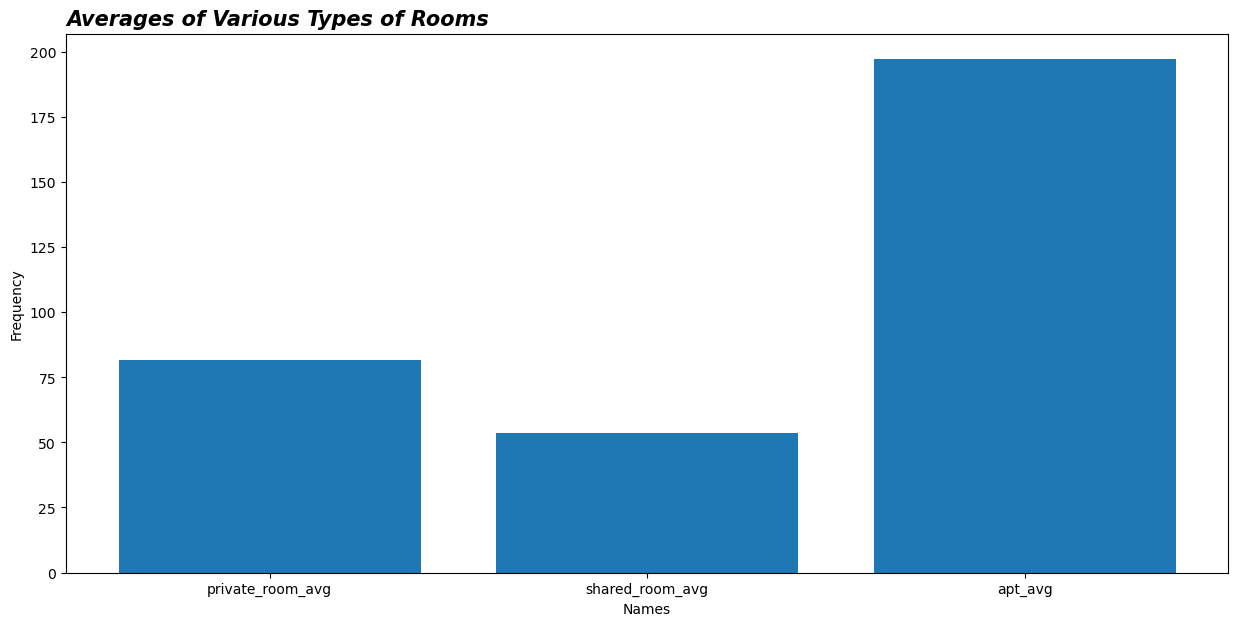

In [112]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(names,averages)
ax.set_title("Averages of Various Types of Rooms", loc="left", fontstyle='italic', fontweight="bold", fontsize="15")
ax.set_ylabel('Frequency')
ax.set_xlabel('Names')



## Q No. 8: Trends Over Time and Line Graph

In [31]:
review["last_review"] = pd.to_datetime(review["last_review"])

In [32]:
review_trend = review.groupby(["last_review"])["listing_id"].count()

In [33]:
review_trend = review_trend.reset_index()

In [34]:
review_trend = review_trend.rename(columns={
    "last_review": "date",
    "listing_id": "no_of_reviews"
})

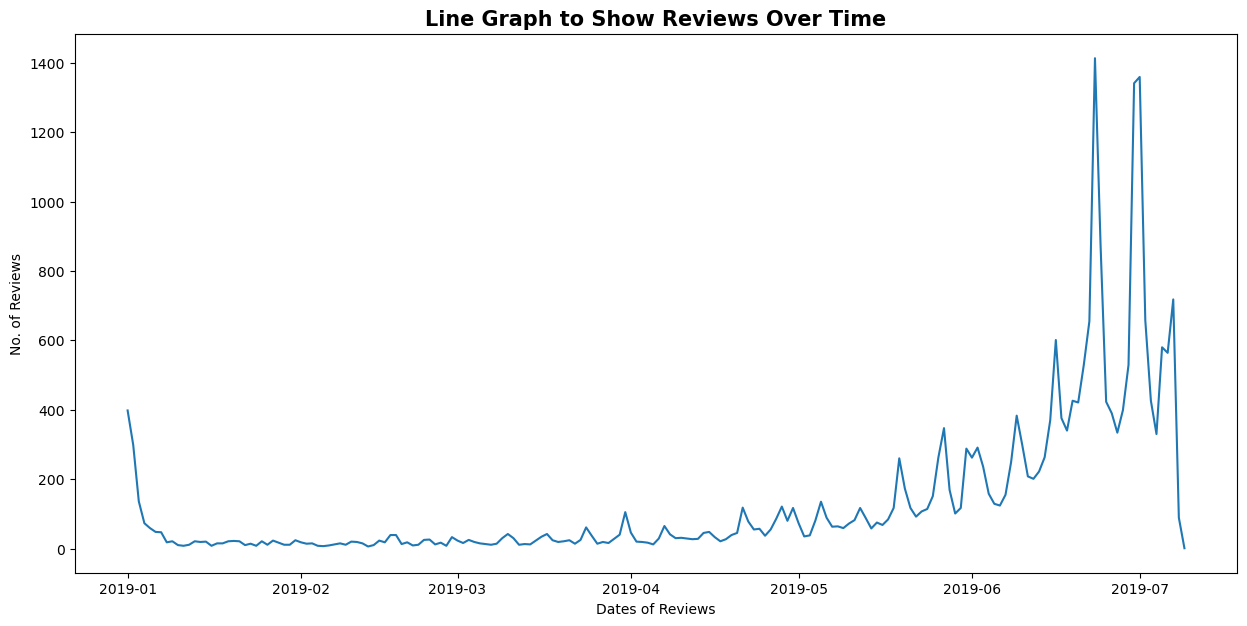

In [111]:
plt.subplots(figsize=(15,7))
plt.xlabel("Dates of Reviews")
plt.ylabel("No. of Reviews")
plt.title("Line Graph to Show Reviews Over Time", fontweight="bold", fontsize="15", loc="left", fontstyle='italic')
plt.plot(review_trend["date"], review_trend["no_of_reviews"])

## Q No. 9: Scatter Plot by Matplotlib
o	Create a scatter plot with a regression line showing the relationship between price and the length of the description.

	Use matplotlib.axes.Axes.annotate to highlight outliers in the graph. (Note: Students should explore this function independently.)


In [38]:
prices = price_room["price"]

In [39]:
word_length = price_room["description"].str.len()

Text(3000, 80, 'Outliers')

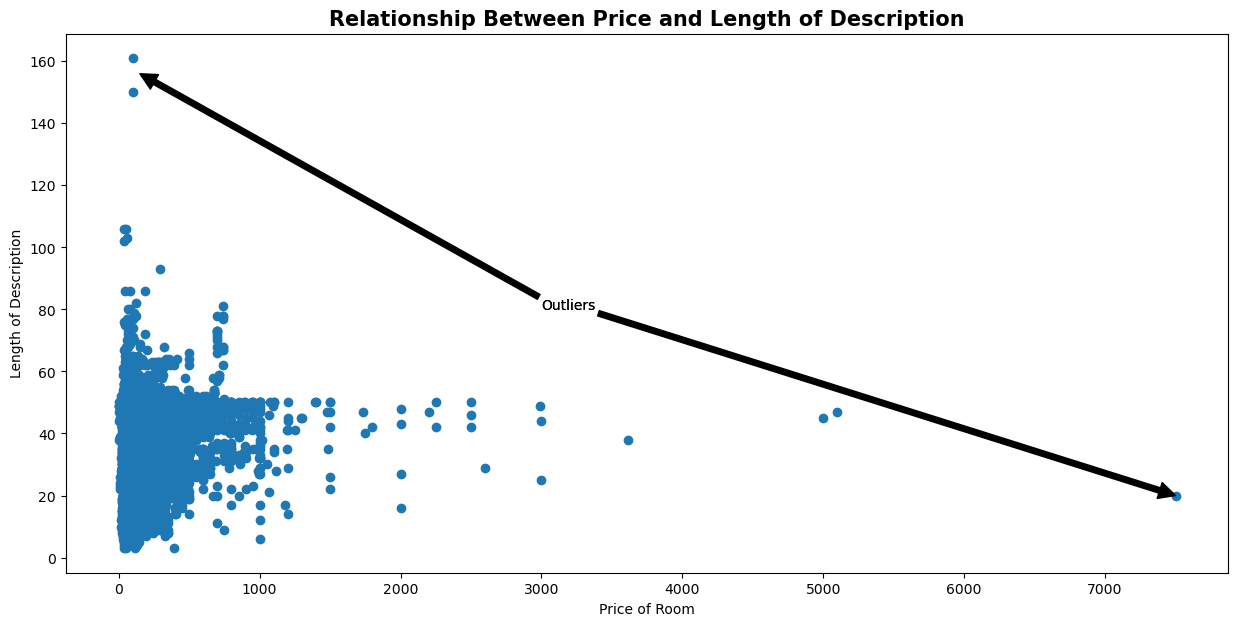

In [110]:
plt.subplots(figsize=(15,7))
plt.scatter(prices,word_length)
plt.title("Relationship Between Price and Length of Description", fontweight="bold", fontsize="15", loc="left", fontstyle='italic')
plt.xlabel("Price of Room")
plt.ylabel("Length of Description")
plt.annotate('Outliers', xy=(7500, 20), xytext=(3000, 80),arrowprops=dict(facecolor='black', shrink=(1)))
plt.annotate('Outliers', xy=(150, 156), xytext=(3000, 80),arrowprops=dict(facecolor='black', shrink=(1)))

## Q No. 10: Strip Plot
o	Generate a strip plot for prices grouped by room_type using the hue parameter to distinguish neighborhoods.

	Students should explore the seaborn.stripplot function.


In [68]:
strip_data = price_room.copy()
strip_data.drop(["listing_id", "description", "nbhood_full"], inplace=True, axis=1)
strip_data = strip_data.sort_values(by="room_type")


Index(['room_type', 'price'], dtype='object')

In [69]:
strip_data["room_type"] = strip_data["room_type"].str.lower()

<Axes: title={'center': 'Strip Plot to Distinguish Neighborhood Prices'}, xlabel='room_type', ylabel='price'>

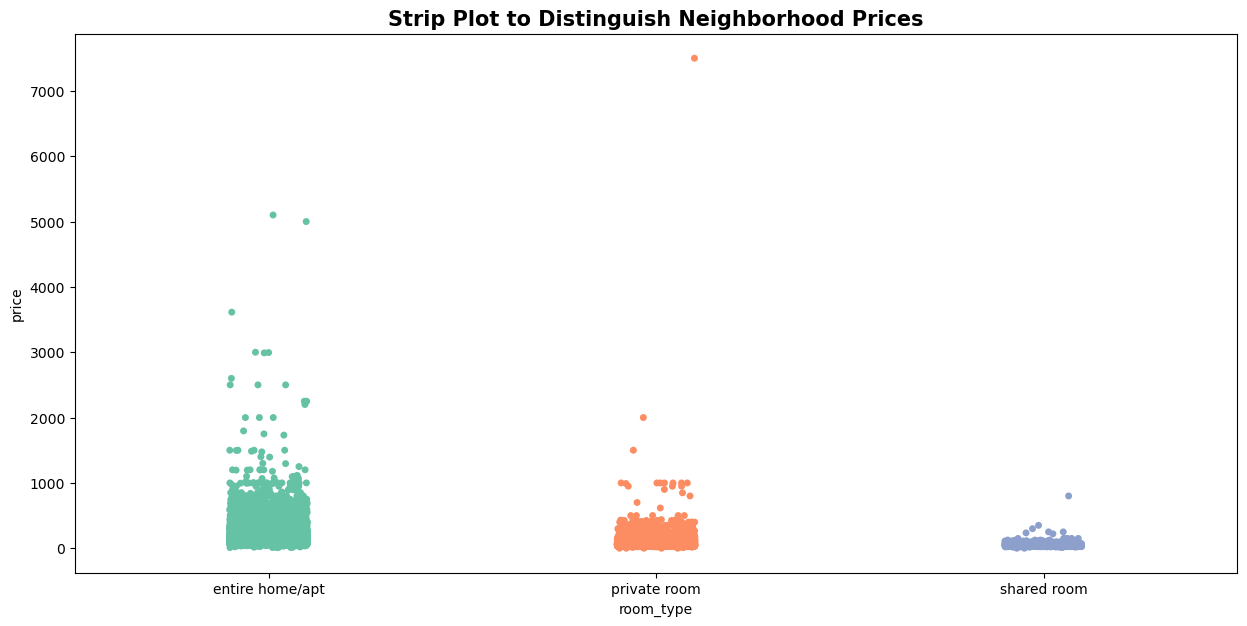

In [109]:
plt.subplots(figsize=(15,7))
plt.title("Strip Plot to Distinguish Neighborhood Prices", fontweight="bold", fontsize="15", loc="left", fontstyle='italic')
sns.stripplot(y=strip_data["price"], data = strip_data, hue="room_type", x="room_type",  palette="Set2")

## Q No. 11:  Bar Chart Showing listings of Each Room Type
Create a bar chart showing the count of listings for each room type.

	Add proper labels, titles, and a legend.


In [89]:
apt = len(price_room[price_room["room_type"].str.lower() == "entire home/apt"])
shared = len(price_room[price_room["room_type"].str.lower() == "shared room"])
private = len(price_room[price_room["room_type"].str.lower() == "private room"])
types = ["Appartment", "Shared", "Private"]
values = [apt,shared,private]

Text(0.5, 0, 'Types')

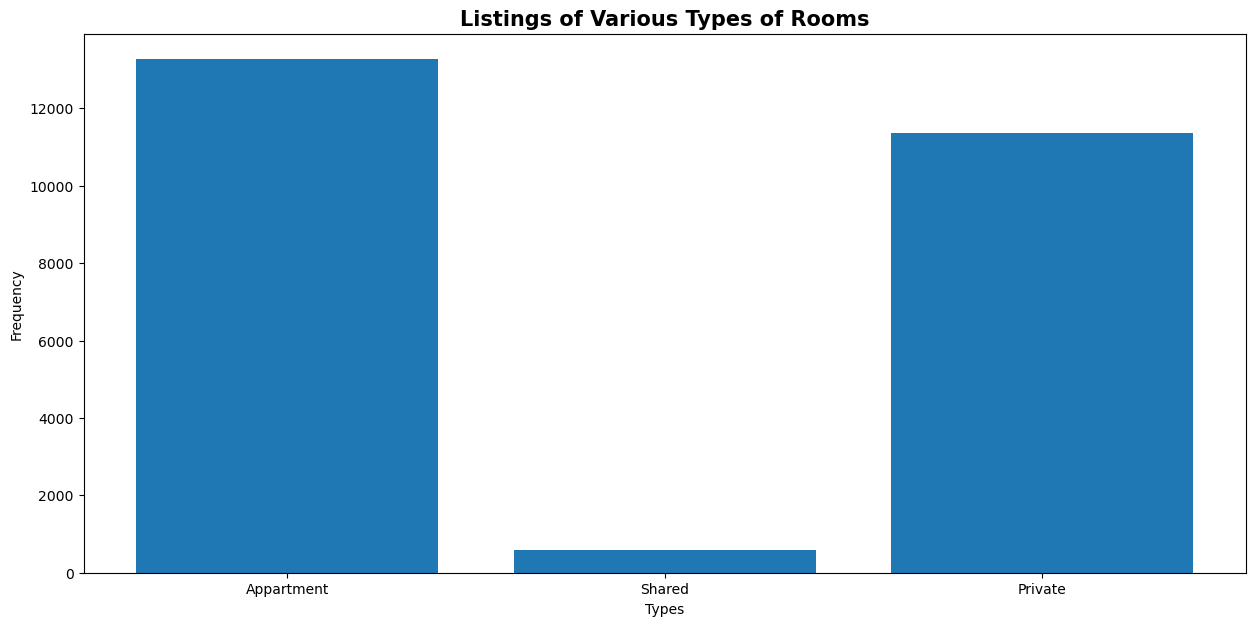

In [108]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(types,values)
ax.set_title("Listings of Various Types of Rooms", fontweight="bold", fontsize="15", loc="left", fontstyle='italic')
ax.set_ylabel('Frequency')
ax.set_xlabel('Types')


## Q No. 12: Heatmap
o	Generate a heatmap to show the correlation (if any) between listing price and the frequency of reviews.

	Use the sns.heatmap function.


In [91]:
price_review = pd.merge(price,review,how="left")
price_review.reset_index()
rev_price = price_review.groupby(["price"])["last_review"].count()


In [92]:
rev_price = rev_price.reset_index()

In [93]:
rev_price = rev_price.rename(columns={
    "price": "listing_price",
    "last_review": "frequency"
})
correlation = rev_price.corr()

<Axes: title={'center': 'Correlation Between Listing Price and Frequency of Reviews'}>

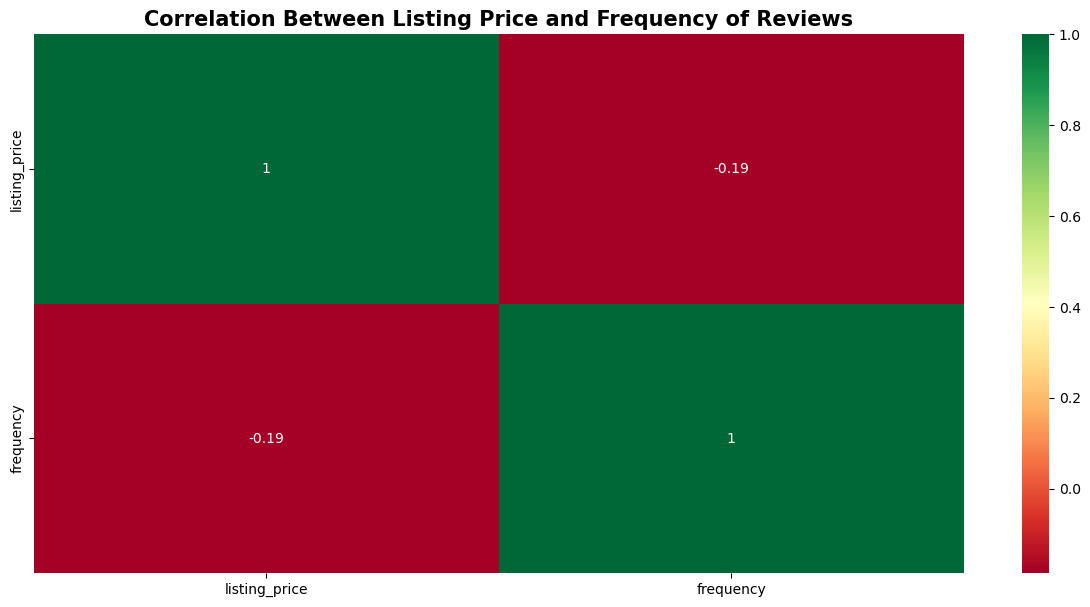

In [107]:
plt.subplots(figsize=(15,7))
plt.title("Correlation Between Listing Price and Frequency of Reviews", fontweight="bold", fontsize="15", loc="left", fontstyle='italic')
sns.heatmap(correlation,cmap="RdYlGn", annot=True)

## Q No. 13: Pie Chart

In [95]:
total_rooms = apt + shared + private
por_apt = (apt/total_rooms) * 100
por_private = (private/total_rooms) * 100
por_shared = (shared/total_rooms) * 100

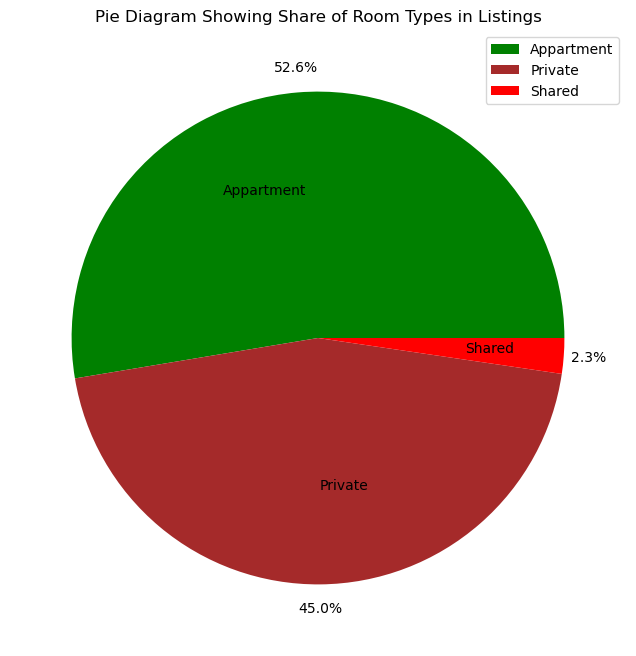

In [96]:
y = [por_apt, por_private, por_shared]
labels = ["Appartment", "Private", "Shared"]
colors = ["green", "brown", "red"]
plt.subplots(figsize=(15,8))
plt.title("Pie Diagram Showing Share of Room Types in Listings", fontweight="bold", fontsize="15", loc="left", fontstyle='italic')
plt.pie(y, labels = labels,colors=colors,autopct='%1.1f%%',pctdistance=1.10, labeldistance=.6)
plt.legend()
plt.show() 

## Q No. 14: Histogram

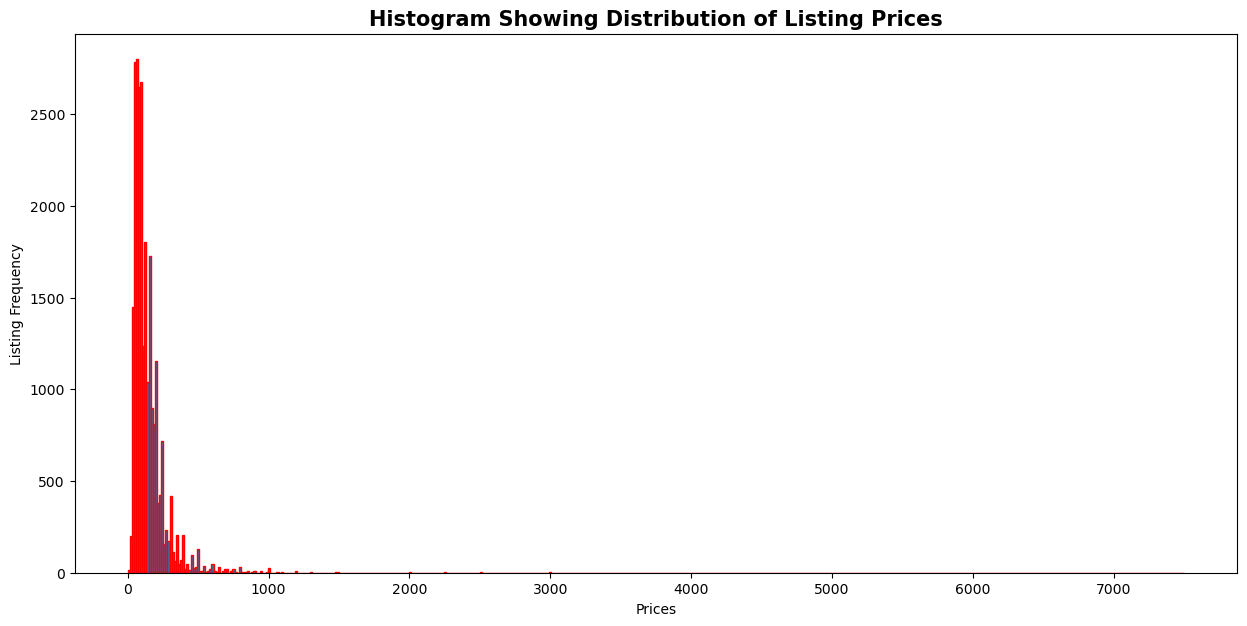

In [103]:
num = price["price"]
plt.subplots(figsize=(15,7))  
plt.hist(num, edgecolor="red", bins=504)
plt.title("Histogram Showing Distribution of Listing Prices", fontweight="bold", fontsize="15", loc="left", fontstyle='italic')
plt.xlabel("Prices")
plt.ylabel("Listing Frequency")
plt.show() 

## Q No. 15: Violin Plot of Top 5 Neighborhoods
o	Create a violin plot to compare price distributions across neighborhoods.

In [104]:
top1 = np.array(price_room[price_room["nbhood_full"] == "Brooklyn, Sea Gate"]["price"])
top2 = np.array(price_room[price_room["nbhood_full"] == "Manhattan, Tribeca"]["price"])
top3 = np.array(price_room[price_room["nbhood_full"] == "Manhattan, Flatiron District"]["price"])
top4 = np.array(price_room[price_room["nbhood_full"] == "Manhattan, NoHo"]["price"])
top5 = np.array(price_room[price_room["nbhood_full"] == "Manhattan, SoHo"]["price"])
y = [top1,top2,top3,top4,top5]

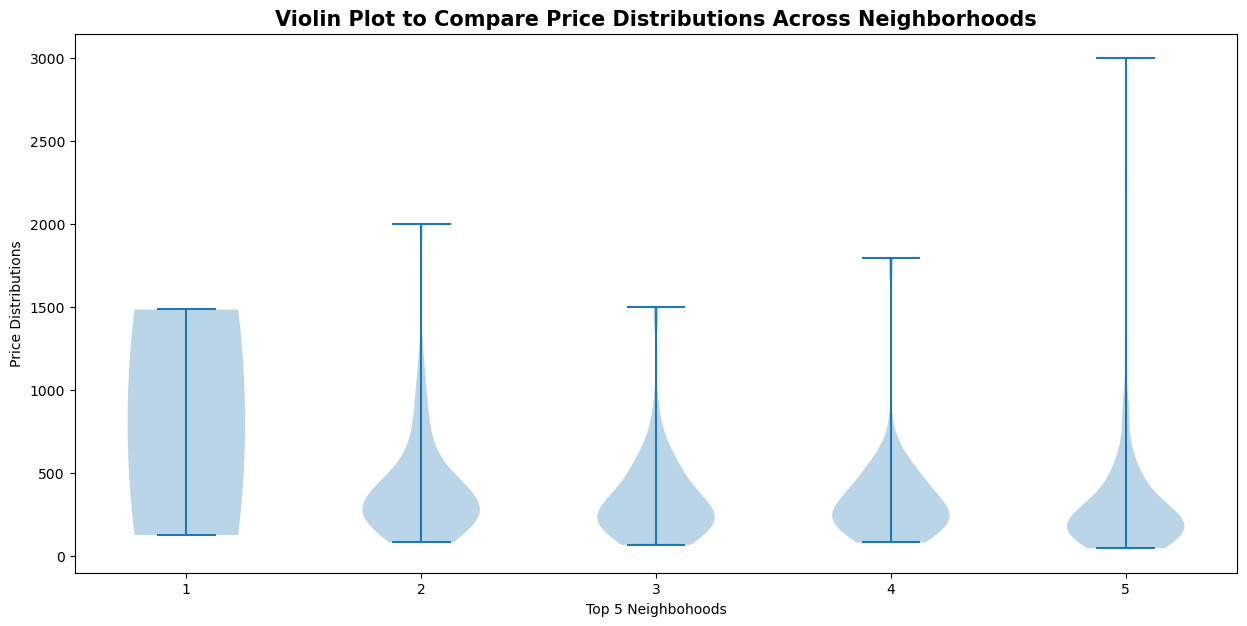

In [106]:
plt.subplots(figsize=(15,7))
plt.violinplot(y)
plt.title("Violin Plot to Compare Price Distributions Across Neighborhoods", fontweight="bold", fontsize="15", loc="left", fontstyle='italic')
plt.xlabel("Top 5 Neighbohoods")
plt.ylabel("Price Distributions")
plt.show()

In [160]:
from collections import Counter
room_desc = room["description"].copy()

Counter(" ".join(room_desc.dropna()).split()).most_common(100)

[('in', 7541),
 ('Private', 2794),
 ('Room', 2460),
 ('to', 2258),
 ('Cozy', 2062),
 ('room', 2023),
 ('Bedroom', 1971),
 ('Brooklyn', 1837),
 ('Apartment', 1758),
 ('2', 1736),
 ('&', 1688),
 ('1', 1530),
 ('Manhattan', 1516),
 ('with', 1498),
 ('the', 1464),
 ('of', 1463),
 ('and', 1427),
 ('bedroom', 1337),
 ('Studio', 1333),
 ('-', 1271),
 ('Spacious', 1268),
 ('East', 1199),
 ('Park', 1167),
 ('apartment', 1101),
 ('Williamsburg', 1007),
 ('Apt', 989),
 ('NYC', 986),
 ('Beautiful', 985),
 ('private', 955),
 ('Sunny', 926),
 ('from', 889),
 ('Village', 851),
 ('Central', 817),
 ('near', 797),
 ('Modern', 738),
 ('Large', 700),
 ('Loft', 669),
 ('a', 633),
 ('Luxury', 607),
 ('Home', 599),
 ('for', 584),
 ('apt', 573),
 ('New', 571),
 ('Charming', 564),
 ('Bright', 562),
 ('|', 560),
 ('The', 557),
 ('3', 556),
 ('heart', 552),
 ('Brownstone', 542),
 ('West', 540),
 ('w/', 523),
 ('+', 521),
 ('1BR', 496),
 ('Harlem', 488),
 ('Times', 484),
 ('Bushwick', 474),
 ('Upper', 462),
 ('Sq

In [161]:
def remove_stop_words (text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return' '.join(filtered_words)

In [157]:
room["description"] = room["description"].astype(str)